# Telco Customer Churn Analysis & Prediction

### Project Overview
This project explores customer churn behavior for a telecommunications company using the 
public Telco Customer Churn dataset from Kaggle. Churn represents whether a customer has 
canceled their service. Reducing churn is critical for subscription-based businesses, as 
retaining existing customers is more cost-effective than acquiring new ones.

The goal of this analysis is to:

- Identify key factors that drive customer churn
- Build a machine learning model to predict which customers are at risk of leaving
- Provide actionable business recommendations to improve customer retention

### Steps in This Project
1. Load and inspect the dataset
2. Clean and preprocess data for modeling
3. Perform exploratory data analysis (EDA)
4. Prepare features and target for machine learning
5. Train and evaluate a predictive model
6. Summarize findings and propose business actions

This end-to-end workflow demonstrates essential data science skills including data cleaning, 
visualization, feature engineering, and machine learning model evaluation.


## 1. Load the data

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv("../data/telco.csv")

# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Basic Data Overview

In [24]:
# Shape: rows and columns
df.shape


(7043, 21)

In [25]:
# Column names
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
# Data types and missing values info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3. Check for Missing and Invalid Values

In [27]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
#TotalCharges – dtype: object (should be numeric)
df['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [29]:
# Look at rows where TotalCharges might not be numeric
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()][['customerID', 'TotalCharges']].head()

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,


## 4. Clean the Data


In [30]:
# Convert TotalCharges to numeric, make invalid values NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many NaN appeared after conversion
df['TotalCharges'].isna().sum()

np.int64(11)

In [45]:
# Drop rows where TotalCharges is NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Confirm number of rows now
df.shape

(7032, 21)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## 5. Explore the Data (EDA)

In [33]:
# Churn class distribution
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

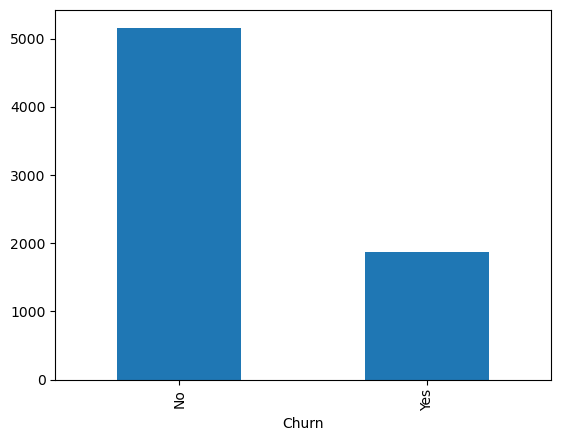

In [34]:
# Churn distribution plot
df['Churn'].value_counts().plot(kind='bar')

In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### 5.1 Numeric Feature Exploration

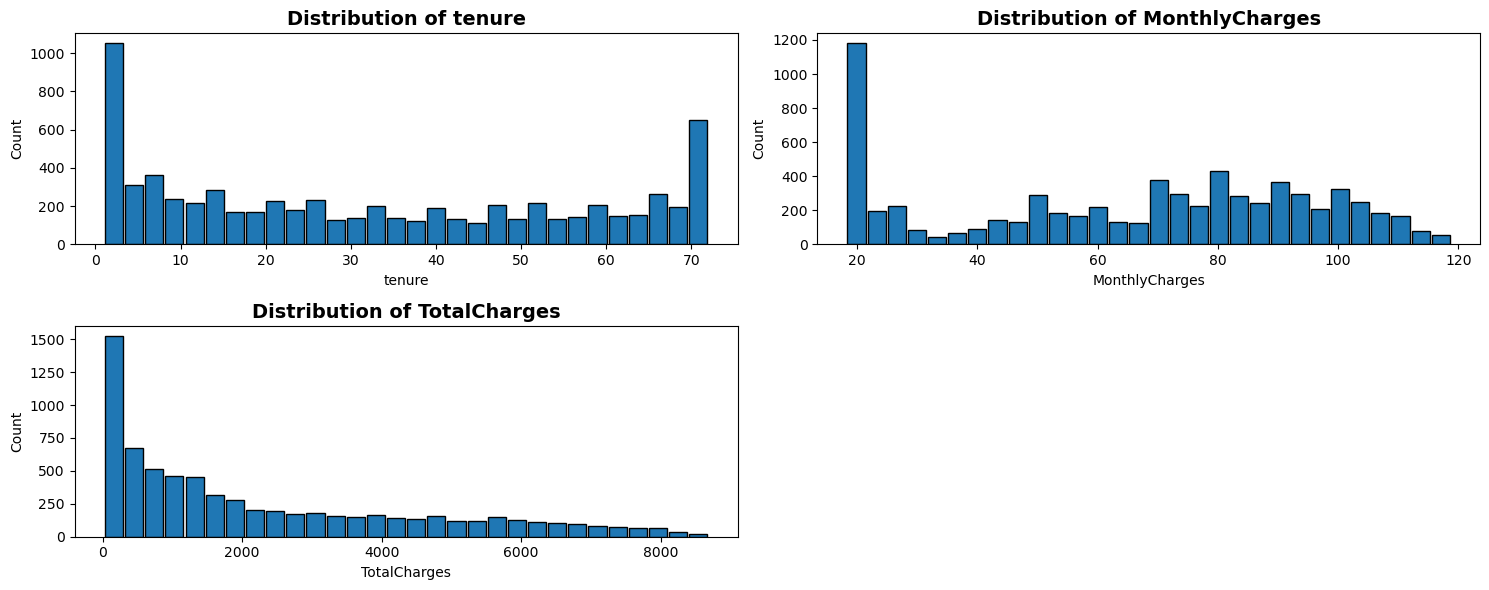

In [46]:
# Distribution plots for numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

axes = df[numeric_cols].hist(
    figsize=(15, 6),
    bins=30,
    edgecolor='black',
    rwidth=0.9
)

for ax, col in zip(axes.flatten(), numeric_cols):
    ax.set_title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.grid(False)

plt.tight_layout()
plt.show()


* The tenure histogram shows that many customers leave early in their contract period. Customers with only a few months of tenure have a much higher churn risk.
* MonthlyCharges distribution shows that customers paying higher monthly fees tend to churn more, suggesting price sensitivity.
* TotalCharges correlates strongly with tenure — customers who have paid more overall are less likely to churn because they have been with the company longer.

Business action:

Offer incentives and discounts early in a customer’s lifecycle to reduce churn during the first months of service.


### 5.2 Categorical Feature Exploration (Compared to Churn)

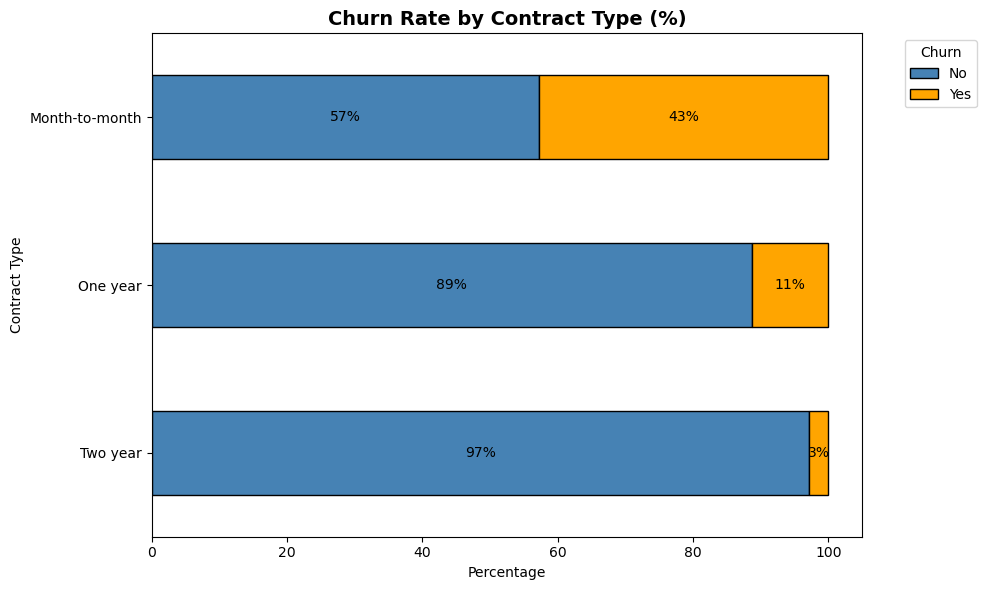

In [44]:
# Calculate churn % (0–1 scale)
contract_churn_pct = pd.crosstab(df['Contract'], df['Churn'], normalize='index').fillna(0)

# Ensure column order: first No then Yes
cols = [c for c in ['No', 'Yes'] if c in contract_churn_pct.columns]
contract_churn_pct = contract_churn_pct[cols]

# Sort from worst → best churn (highest Yes first)
sorted_contract = contract_churn_pct.sort_values(by='Yes', ascending=True)

# Plot as percentages
ax = (sorted_contract * 100).plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['steelblue', 'orange'],
    edgecolor='black'
)

# Formatting
plt.title("Churn Rate by Contract Type (%)", fontsize=14, fontweight='bold')
plt.xlabel("Percentage")
plt.ylabel("Contract Type")
ax.grid(False)

# Legend outside the plot
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')

# Percentage labels inside bars
for container in ax.containers:
    ax.bar_label(container, labels=[f"{bar.get_width():.0f}%" for bar in container],
                 label_type='center')

plt.tight_layout()
plt.show()


* Customers with month-to-month contracts churn significantly more than customers with one-year or two-year contracts.
* Long-term contract customers are much more loyal because they are committed and possibly receive better pricing.

Business action:

Encourage more customers to switch from month-to-month plans to annual contracts (e.g., discounts, loyalty perks).

### 5.3 Internet Service vs Churn

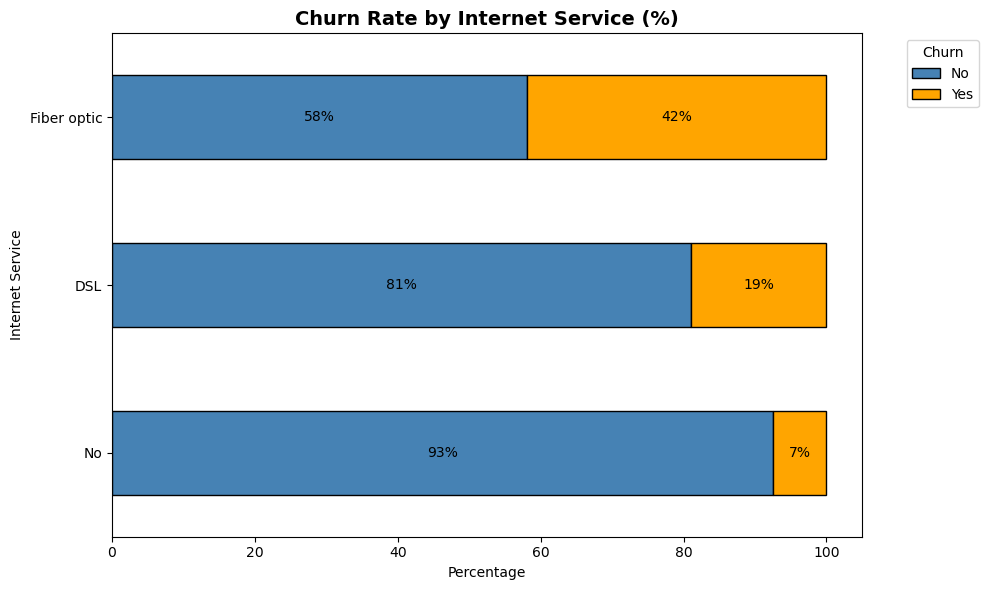

In [38]:
# Calculate churn % by Internet Service type (0-1 scale)
internet_churn_pct = pd.crosstab(df['InternetService'], df['Churn'], normalize='index').fillna(0)

# Ensure correct column order
cols = [c for c in ['No', 'Yes'] if c in internet_churn_pct.columns]
internet_churn_pct = internet_churn_pct[cols]

# Sort worst → best churn
sorted_internet = internet_churn_pct.sort_values(by='Yes', ascending=True)

# Plot as percentages
ax = (sorted_internet * 100).plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['steelblue', 'orange'],
    edgecolor='black'
)

# Style
plt.title("Churn Rate by Internet Service (%)", fontsize=14, fontweight='bold')
plt.xlabel("Percentage")
plt.ylabel("Internet Service")
ax.grid(False)

# Legend outside
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')

# % labels inside bars
for container in ax.containers:
    ax.bar_label(container, labels=[f"{bar.get_width():.0f}%" for bar in container],
                 label_type='center')

plt.tight_layout()
plt.show()

Customers who use Fiber-optic internet churn more often than DSL or those with no internet service.
This suggests that fiber-optic customers may be less satisfied — possibly due to price or service issues.

Business action:

Investigate cost/quality complaints from fiber-optic customers and offer retention support targeted at this group.

### 5.4 Correlation Heatmap (numeric only)

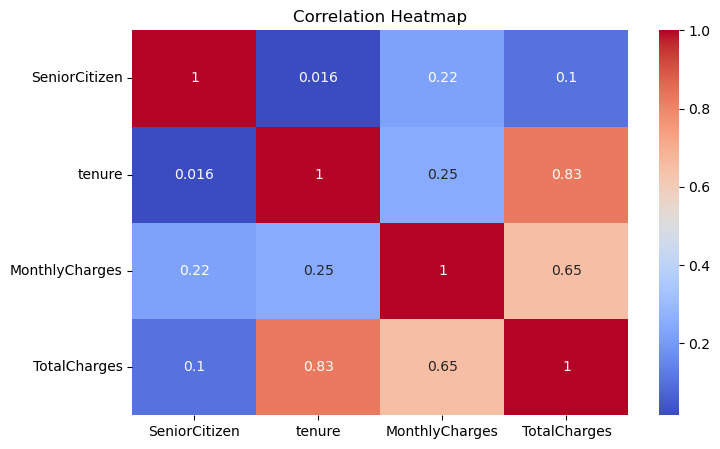

In [39]:

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


* Tenure and TotalCharges have a strong positive correlation (0.83). Customers who stay longer bring more total revenue, meaning loyal customers are financially valuable.
* MonthlyCharges and TotalCharges also show a positive relationship (0.65). This means high-cost customers pay more overall, but they are also at higher risk of churn based on earlier analysis.
* Tenure and MonthlyCharges have only a weak correlation (0.25). Paying more does not necessarily mean a customer stays longer.
* SeniorCitizen has almost no correlation with tenure (0.016). Being a senior does not influence how long customers remain with the company — churn is driven by other factors.

 Business action:

The company benefits most from increasing customer tenure.  
Retention efforts should focus on helping newer customers stay longer, since revenue grows significantly the longer the customer relationship continues.



### 5.5 Payment Method vs Churn

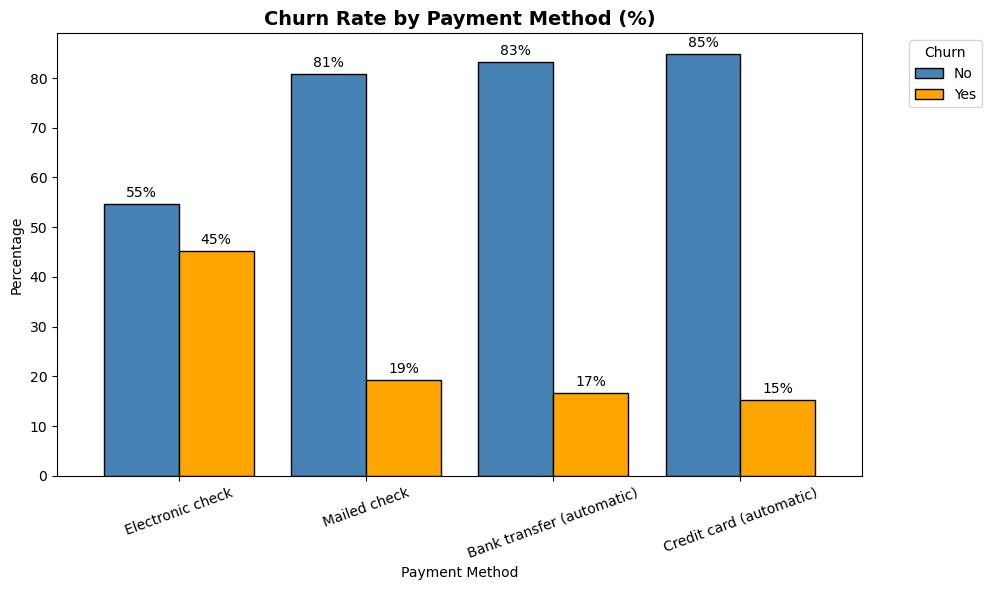

In [40]:
payment_churn_pct = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

# Sort by churn = Yes from highest → lowest
sorted_payment = payment_churn_pct.sort_values(by='Yes', ascending=False)

ax = sorted_payment.plot(
    kind='bar',
    figsize=(10, 6),
    color=['steelblue', 'orange'],
    edgecolor='black',
    width=0.8
)

plt.title("Churn Rate by Payment Method (%)", fontsize=14, fontweight='bold')
plt.xlabel("Payment Method")
plt.ylabel("Percentage")
plt.xticks(rotation=20)
ax.grid(False)

plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    labels = [f'{v.get_height():.0f}%' for v in container]
    ax.bar_label(container, labels=labels, padding=3)

plt.tight_layout()
plt.show()



* Electronic Check has the highest churn rate of all payment methods.
* Automatic payments (credit card or bank transfer) show much lower churn, likely due to convenience and reduced hassle.
* Customers with higher churn payment methods may also be more price-sensitive or less committed.

Business Action:

Encourage customers using Electronic Check to switch to automatic payment options by offering incentives or discounts.

### 5.6 SeniorCitizen vs Churn

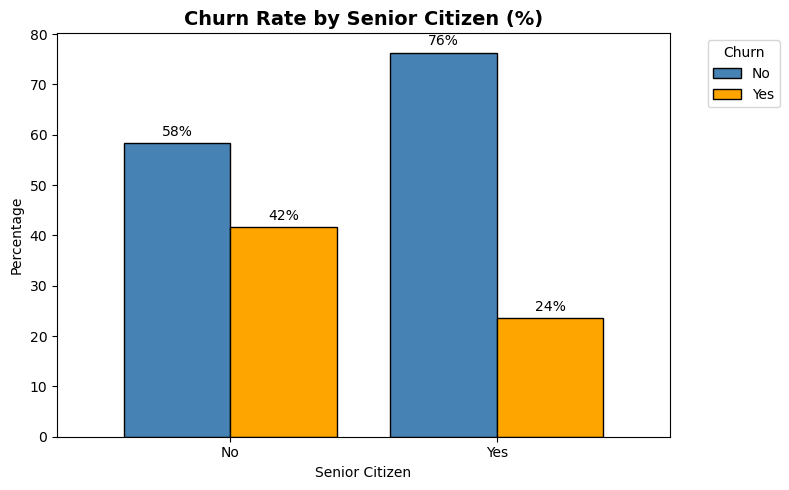

In [41]:
senior_churn_pct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
sorted_senior = senior_churn_pct.sort_values(by='Yes', ascending=False)

ax = sorted_senior.plot(
    kind='bar',
    figsize=(8, 5),
    color=['steelblue', 'orange'],
    edgecolor='black',
    width=0.8
)

plt.title("Churn Rate by Senior Citizen (%)", fontsize=14, fontweight='bold')
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
ax.set_xticklabels(['No', 'Yes'])
ax.grid(False)

plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels above each bar
for container in ax.containers:
    labels = [f'{v.get_height():.0f}%' for v in container]
    ax.bar_label(container, labels=labels, padding=3)

plt.tight_layout()
plt.show()


* Senior citizens churn **less often** (24%) compared to non-seniors (42%).
* This suggests that older customers may be more loyal or value stability in their service.
* Younger customers (non-seniors) are at a higher risk of leaving.

Business Action:

Focus retention efforts on younger customers, especially new customers with monthly contracts.
Senior customers remain loyal, so resources can be better spent on higher-risk segments.

### 5.7 Partner vs Churn

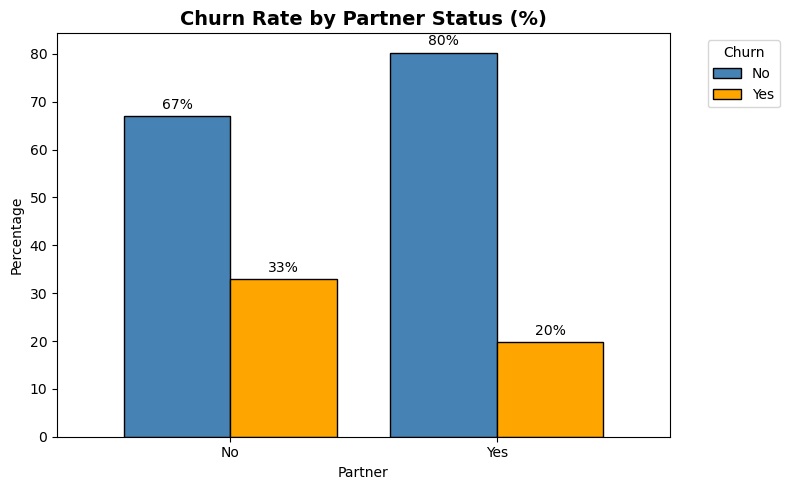

In [42]:
partner_churn_pct = pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100
sorted_partner = partner_churn_pct.sort_values(by='Yes', ascending=False)

ax = sorted_partner.plot(
    kind='bar',
    figsize=(8, 5),
    color=['steelblue', 'orange'],
    edgecolor='black',
    width=0.8
)

plt.title("Churn Rate by Partner Status (%)", fontsize=14, fontweight='bold')
plt.xlabel("Partner")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
ax.grid(False)

plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels above each bar
for container in ax.containers:
    labels = [f'{v.get_height():.0f}%' for v in container]
    ax.bar_label(container, labels=labels, padding=3)

plt.tight_layout()
plt.show()


* Customers with a partner are less likely to churn.
* People in families tend to be more stable and loyal customers.

Business Action:

Promote bundle or family plans that encourage more household members to join.

### 5.8 Dependents vs Churn

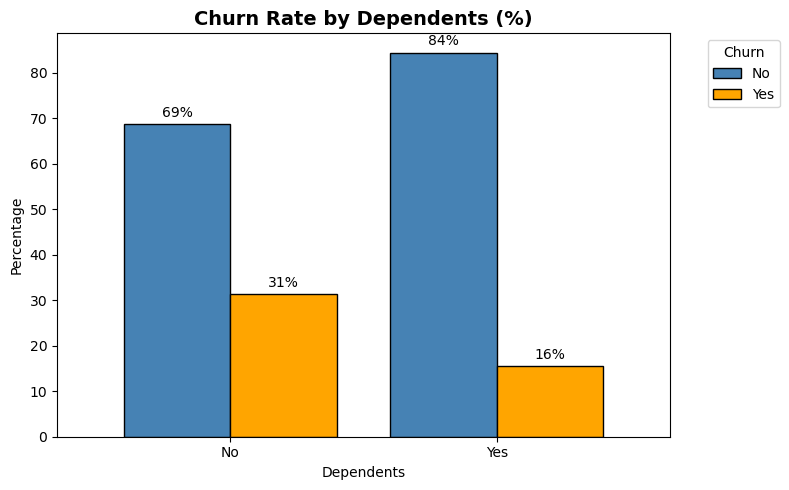

In [43]:
dependents_churn_pct = pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100
sorted_dependents = dependents_churn_pct.sort_values(by='Yes', ascending=False)

ax = sorted_dependents.plot(
    kind='bar',
    figsize=(8, 5),
    color=['steelblue', 'orange'],
    edgecolor='black',
    width=0.8
)

plt.title("Churn Rate by Dependents (%)", fontsize=14, fontweight='bold')
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
ax.grid(False)

plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels above each bar
for container in ax.containers:
    labels = [f'{v.get_height():.0f}%' for v in container]
    ax.bar_label(container, labels=labels, padding=3)

plt.tight_layout()
plt.show()

* Customers with dependents churn significantly less than those without.
* Families are stronger long-term customers.

Business Action:

Create retention-focused offers for customers without dependents (e.g., entertainment bundles).

## **EDA Summary**
### Key Takeaways from EDA

* Churn is significantly higher for:
  - Month-to-month contract customers
  - Fiber optic internet users
  - Electronic check payment users
  - Younger customers without partners or dependents

* Customers with longer tenures churn less → loyalty builds over time.
* Senior citizens churn less than younger customers.
* Churn is a business concern driven mainly by **contract type, cost, and customer stability**.

### Business Direction
To reduce churn, the company should:
* Convert month-to-month users to longer-term contracts through offers & retention programs.
* Improve pricing or satisfaction for fiber optic customers.
* Encourage automatic payments instead of electronic check.
* Target young single customers with engagement incentives.


## **6. Prepare the Data for Modeling**

Before training a machine learning model, we need to prepare the data:
- Convert the target column `Churn` into numeric values (1 = Yes, 0 = No)
- Remove non-useful columns such as `customerID`
- One-hot encode categorical features so they can be used by the model
- Split the data into training and testing sets to evaluate the model’s performance


### 6.1 Encode Target Variable

Machine learning models cannot work with text labels like "Yes" and "No". By mapping churn
to 1 (Yes) and 0 (No), the model can learn to distinguish between customers who churn and
those who stay using mathematical operations.

In [47]:
# Convert Churn column to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

### 6.2 Split Features (X) and Target (y)

To train a supervised machine learning model, we need to separate the data into:
- **Features (X):** Customer characteristics used to predict churn
- **Target (y):** The `Churn` column, which indicates whether the customer left

We drop:
- `Churn` from the feature set to avoid data leakage
- `customerID` because it is an identifier with no predictive value

In [48]:
# Drop columns not useful for modeling
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

### 6.3 One-Hot Encode Categorical Variables

Machine learning models require numerical inputs. Categorical variables such as Contract type,
Internet service, or Payment method must be converted into a numeric format. We use one-hot 
encoding to create separate binary columns for each category without introducing any false 
numeric ordering.

In [49]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [54]:
# Convert all boolean columns to integers (0/1)
X = X.astype(int)

### 6.4 Train/Test Split

We split the data so the model can learn patterns from the training set and then be evaluated 
on unseen data (the test set). This helps prevent overfitting and allows us to measure how 
well the model generalizes to new customers.


In [57]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify the split sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5625, 30), (1407, 30), (5625,), (1407,))

## **7. Train Logistic Regression Model**

Logistic Regression is a strong baseline model for binary classification problems such as 
predicting customer churn. The model will learn patterns from the training data and then 
predict whether new customers are likely to churn.


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7867803837953091

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[914 119]
 [181 193]]


### **Business Interpretation**

The logistic regression model achieves an accuracy of around 79%, which is a strong baseline 
score. The model performs very well at identifying customers who will stay (recall = 88%), 
but struggles more with customers who will churn (recall = 52%). This means that some 
high-risk customers are not being detected.

#### Recommendation

To improve detection of churners, the company can use:
- A different algorithm such as Random Forest or Gradient Boosting
- Class balancing techniques (SMOTE, class weights)
- Additional customer features (Satisfaction score, historical behavior)

Despite limitations, this model already provides value by predicting many potential churners, 
allowing the business to target them with retention strategies.


## **Final Project Conclusion — Telco Customer Churn**

### Summary of Findings
This project analyzed customer churn using exploratory data analysis and a logistic regression
model. The results show that churn is strongly associated with:

- **Month-to-month contracts**
- **Fiber optic internet**
- **Electronic check payment method**
- **Younger customers without partners or dependents**
- **Short tenure (newer customers)**

These customers are at the highest risk of leaving the company and should be prioritized for
retention strategies.

### Model Performance
A logistic regression model was trained to predict churn. It achieved:

- **79% accuracy**
- Strong performance predicting customers who stay (recall = 88%)
- Moderate performance detecting churners (recall = 52%)

The model is already useful in identifying many high-risk customers, but there is room for 
improvement in detecting all churners.

### Business Recommendations
To reduce churn, the company should:

1. Encourage **long-term contracts** through discounts and special offers.
2. Improve customer satisfaction for **fiber optic users** (speed issues, pricing concerns).
3. Transition customers from **electronic check** to automatic payments.
4. Target **younger customers without dependents** with engagement and loyalty programs.
5. Focus retention efforts early: **new customers** are the most likely to churn.

These actions can increase customer lifetime value and reduce revenue loss.

### Future Work
To further improve churn prediction:

- Try more advanced models such as **Random Forest** or **Gradient Boosting**
- Address class imbalance using **class weights** or **SMOTE**
- Include additional customer satisfaction or service quality features
- Perform hyperparameter tuning for better model accuracy

---

This project demonstrates the full data science workflow: data cleaning, EDA, feature 
preprocessing, predictive modeling, and actionable business insights that help prioritize 
retention efforts.
